In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

data = pd.read_csv('USA_Education_Proportions_updatedforpuerto.csv')


In [3]:
for column_name in data.columns: 
    print(column_name)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Class room teachers FTE COUNT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Total per state
Total Enrollment Per State
AP total enrollment per state
SAT-ACT Percent per state
AP enrollent Percent Per state


In [4]:
data.drop("Class room teachers FTE COUNT", inplace =True, axis =1)
data.drop("SAT-ACT Total per state", inplace =True, axis =1)
data.drop("Total Enrollment Per State", inplace =True, axis =1)
data.drop("AP total enrollment per state", inplace =True, axis =1)

for column_name in data.columns: 
    print(column_name)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Percent per state
AP enrollent Percent Per state


In [29]:
data.head()

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Class room teachers FTE COUNT,Meeting all lic. & cert. Percent,First year of teaching PERCENT,Second year of teaching PERCENT,SAT-ACT Total per state,Total Enrollment Per State,AP total enrollment per state,SAT-ACT Percent per state,AP enrollent Percent Per state
0,"50 states, District of Columbia, and Puerto Rico",0.864471,0.848101,0.807778,0.671834,0.494813,0.868885,0.745276,0.617517,3324084.02,0.968187,0.061890,0.054890,3653685,50922024,3030991,0.071751,0.059522
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,47512.87,0.893793,0.049056,0.041761,61719,742981,33466,0.083069,0.045043
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,7312.09,0.992705,0.058439,0.053025,4874,131621,4487,0.037031,0.034090
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,60874.99,0.902107,0.083565,0.068370,60972,1146677,60290,0.053173,0.052578
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,34876.23,0.977487,0.076790,0.054996,46644,496573,30154,0.093932,0.060724


At this point the data is now holding the features all in percentages just as in R

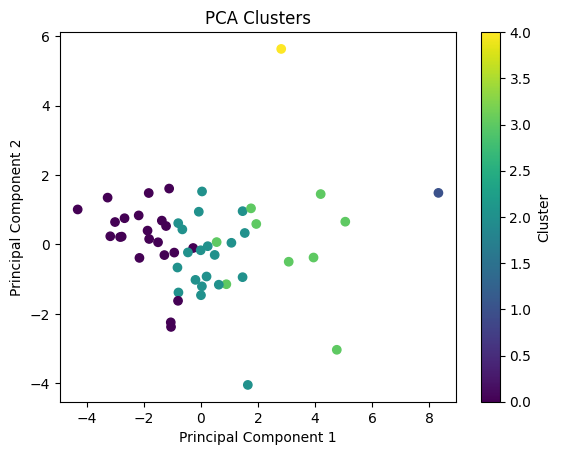

Cluster 0: ['District of Columbia', 'Georgia', 'Indiana', 'Iowa', 'Kansas', 'Maine', 'Maryland', 'Massachusetts', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Carolina', 'Ohio', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Texas', 'Vermont', 'Virginia', 'West Virginia', 'Wisconsin']
Cluster 1: ['Alaska']
Cluster 2: ['50 states, District of Columbia, and Puerto Rico', 'Alabama', 'Arizona', 'Arkansas', 'Florida', 'Hawaii', 'Illinois', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'North Dakota', 'Oklahoma', 'South Dakota', 'Tennessee', 'Wyoming']
Cluster 3: ['California', 'Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Minnesota', 'Oregon', 'Utah', 'Washington']
Cluster 4: ['Puerto Rico']


In [12]:
#PCA from ChatGPT: 

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Load your data from CSV

# Extract state column (if needed for visualization or labeling)
states = data['State']  

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Scale the numeric data
scaled_data = preprocessing.scale(data_numeric)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Visualize clusters (example using first two principal components)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Associate states with clusters
state_clusters = pd.DataFrame({'State': states, 'Cluster': clusters})

# Print states in each cluster
for cluster_id in range(5):  # Assuming 5 clusters
    states_in_cluster = state_clusters[state_clusters['Cluster'] == cluster_id]['State']
    print(f'Cluster {cluster_id}: {states_in_cluster.tolist()}')





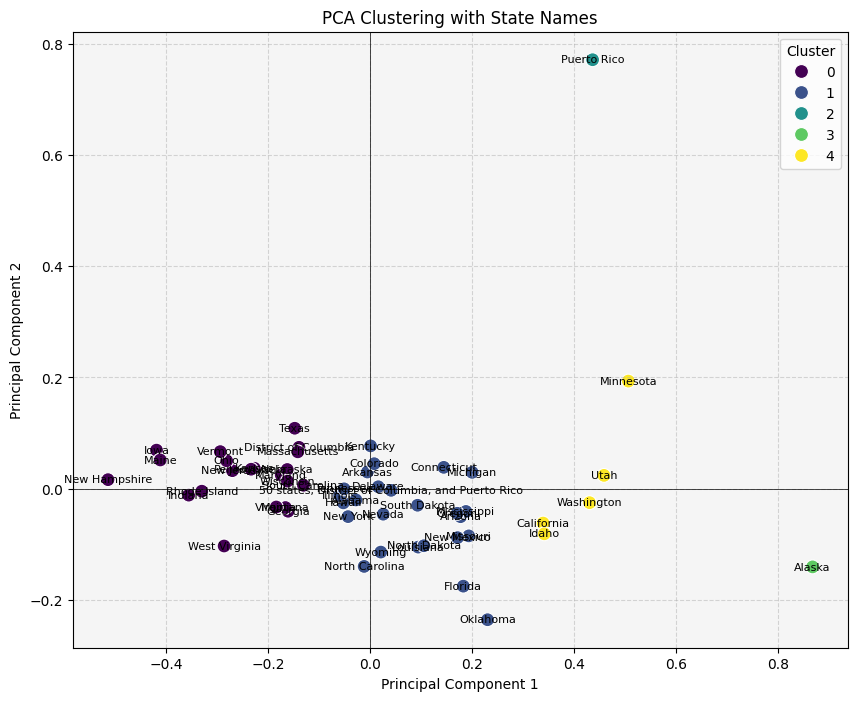

In [10]:
##getting fancier by promting ChatGPT some more...

import seaborn as sns  # for advanced styling
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd


# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=100)

# Add state names as text annotations
for i, state in enumerate(states):
    plt.text(pca_data[i, 0], pca_data[i, 1], state, fontsize=8, ha='center', va='center')

# Add labels and legend
plt.title('PCA Clustering with State Names')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

# Customize grid lines and background
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')

plt.show()


In [13]:
#interactive plot of pca
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='PCA Clustering with State Names', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Define the layout for the app
app = dash.Dash(__name__)

# Create a range of cluster values for the slider
cluster_range = list(range(1, 11))

# Define the app layout
app.layout = html.Div([
    html.H1("PCA Clustering with State Names"),
    dcc.Graph(id='cluster-graph'),
    html.Label('Number of Clusters'),
    dcc.Slider(
        id='cluster-slider',
        min=1,
        max=10,
        step=1,
        value=5,
        marks={i: str(i) for i in cluster_range}
    )
])

# Define callback to update the plot based on slider value
@app.callback(
    Output('cluster-graph', 'figure'),
    [Input('cluster-slider', 'value')]
)
def update_cluster_graph(num_clusters):
    # Perform clustering on PCA-transformed data with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(pca_data)

    # Create a DataFrame for visualization
    plot_data = pd.DataFrame({
        'PC1': pca_data[:, 0],
        'PC2': pca_data[:, 1],
        'State': states,
        'Cluster': clusters
    })

    # Create an interactive scatter plot using Plotly 
    fig = px.scatter(plot_data, x='PC2', y='PC1', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters})',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},   #this seciton was modidifed to view the second PCA
                     template='plotly_white', width=800, height=600)


    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
#back up code for interactive plot above...

fig = px.scatter(plot_data, x='PC2', y='PC1', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters})',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                     template='plotly_white', width=800, height=600)


#original code for PCa 1
    # Create an interactive scatter plot using Plotly
    fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters})',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                     template='plotly_white', width=800, height=600)


In [23]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Define the layout for the app
app = dash.Dash(__name__)

# Create a range of cluster values for the cluster slider
cluster_range = list(range(1, 11))

# Create a range of principal component values for the PCA slider
pca_range = list(range(1, min(data_numeric.shape) + 1))

# Define the app layout
app.layout = html.Div([
    html.H1("PCA Clustering with State Names"),
    dcc.Graph(id='cluster-graph'),
    html.Label('Number of Clusters'),
    dcc.Slider(
        id='cluster-slider',
        min=1,
        max=10,
        step=1,
        value=5,
        marks={i: str(i) for i in cluster_range}
    ),
    html.Label('Number of Principal Components'),
    dcc.Slider(
        id='pca-slider',
        min=1,
        max=min(data_numeric.shape),
        step=1,
        value=2,
        marks={i: str(i) for i in pca_range}
    )
])

# Define callback to update the plot based on slider values
@app.callback(
    Output('cluster-graph', 'figure'),
    [Input('cluster-slider', 'value'),
     Input('pca-slider', 'value')]
)
def update_cluster_graph(num_clusters, num_pca_components):
    # Perform PCA with the specified number of components
    pca = PCA(n_components=num_pca_components)
    pca_data = pca.fit_transform(data_numeric)

    # Perform clustering on PCA-transformed data with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(pca_data)

    # Create a DataFrame for visualization
    plot_data = {'State': states, 'Cluster': clusters}
    for i in range(1, num_pca_components + 1):
        plot_data[f'PC{i}'] = pca_data[:, i-1]

    # Create an interactive scatter plot using Plotly
    fig = px.scatter(plot_data, x=f'PC{num_pca_components}', y=f'PC1', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters}, Components: {num_pca_components})',
                     labels={'PC1': 'Principal Component 1', f'PC{num_pca_components}': f'Principal Component {num_pca_components}'},
                     template='plotly_white', width=800, height=600)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
